In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
df1 = pd.read_csv("C:\\Users\\Maria\\OneDrive\\Desktop\\python project\\Data\\features_30_sec.csv")
df2 = pd.read_csv("C:\\Users\\Maria\\OneDrive\\Desktop\\python project\\Data\\features_3_sec.csv")

# Check first rows
print(df1.head())
print(df2.head())

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [18]:
print("30 sec dataset shape:", df1.shape)
print("3 sec dataset shape:", df2.shape)

print("\nColumns in 30 sec dataset:\n", df1.columns)
print("\nColumns in 3 sec dataset:\n", df2.columns)

30 sec dataset shape: (1000, 60)
3 sec dataset shape: (9990, 60)

Columns in 30 sec dataset:
 Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'm

In [19]:
print("\nMissing values (30 sec):\n", df1.isnull().sum())
print("\nMissing values (3 sec):\n", df2.isnull().sum())

print("\nData types:\n")
print(df1.info())



Missing values (30 sec):
 filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean      

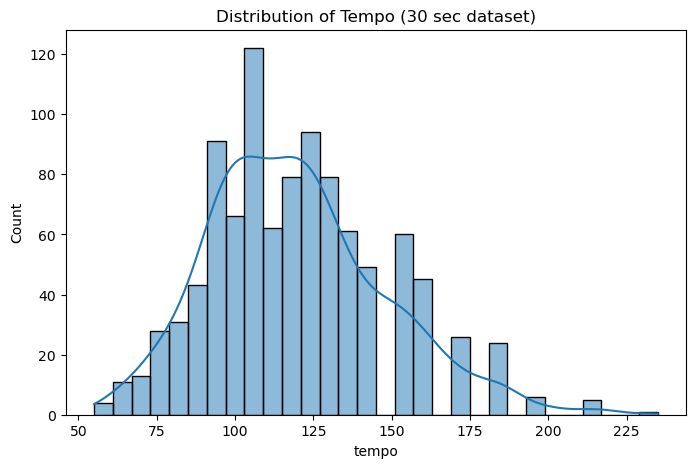

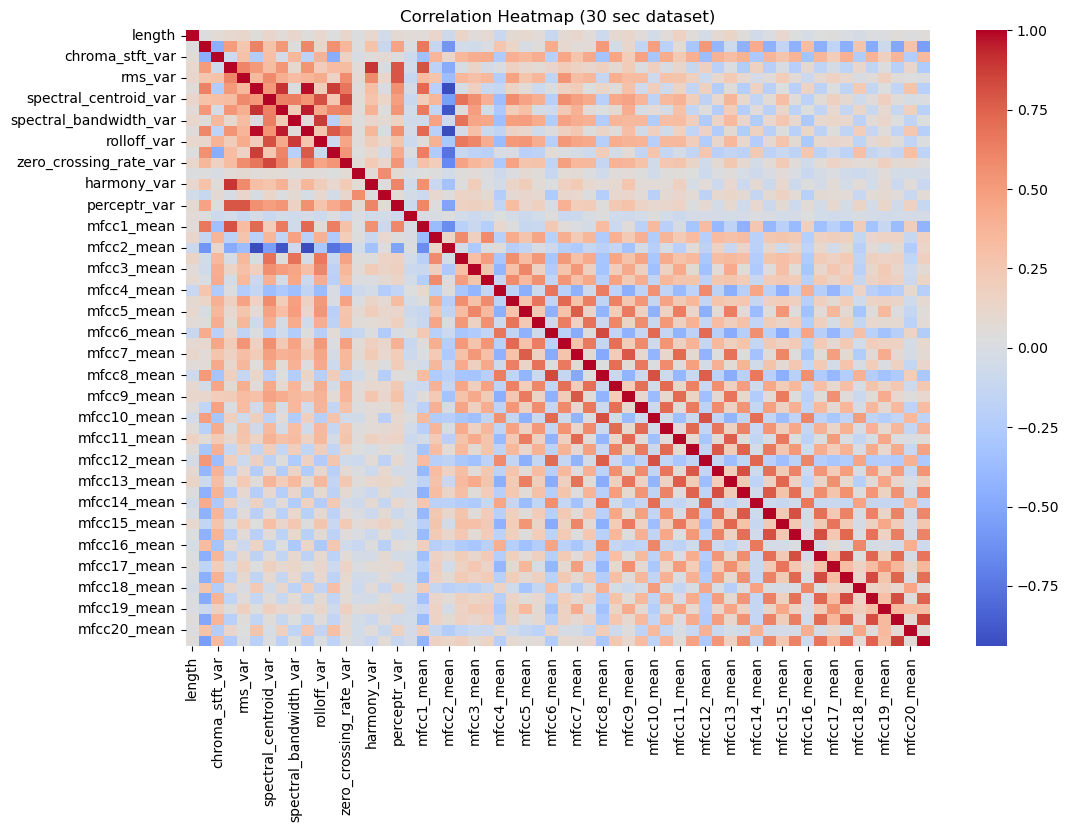

In [20]:
# Example visualization - distribution of tempo
plt.figure(figsize=(8,5))
sns.histplot(df1["tempo"], bins=30, kde=True)
plt.title("Distribution of Tempo (30 sec dataset)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (30 sec dataset)")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#  Unwanted columns drop karo (jaise filename)
if "filename" in df1.columns:
    df1 = df1.drop("filename", axis=1)

#  Target (label) ko encode karo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["label"] = le.fit_transform(df1["label"])

#  Features aur target split
X = df1.drop("label", axis=1)
y = df1["label"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model train
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

#  Predict
y_pred = model.predict(X_test)

#  Accuracy
from sklearn.metrics import accuracy_score
print("Model Accuracy:", accuracy_score(y_test, y_pred))



Model Accuracy: 0.77
